In [2]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [3]:
bank_data = pd.read_csv('bank-marketing.csv', sep=';')

In [4]:
bank_data[0:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
"""bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})"""
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [6]:
bank_data.columns = bank_data.columns.str.strip().str.lower()

In [7]:
default_col = [col for col in bank_data.columns if 'default' in col.lower()]
print(default_col)

['default']


In [8]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [9]:
# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
rf = RandomForestClassifier()
rf.fit(X_train_encoded, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
from sklearn.preprocessing import LabelEncoder

for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y_pred = rf.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9162418062636563


In [15]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6684280052840158


In [16]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.5354497354497354


In [17]:
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score:", f1_score)

F1 Score: 0.5945945945945946


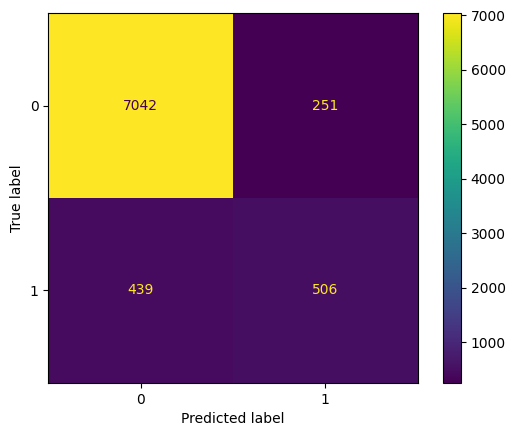

In [18]:
cm = confusion_matrix(y_test,y_pred)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

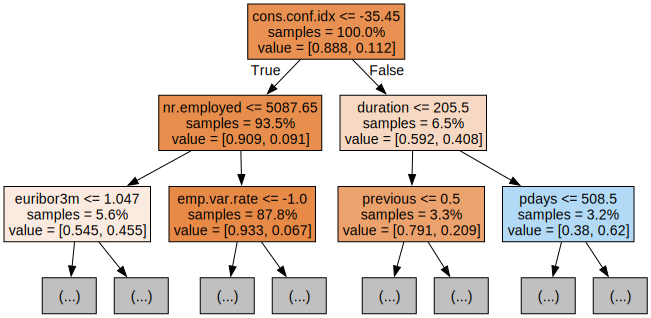

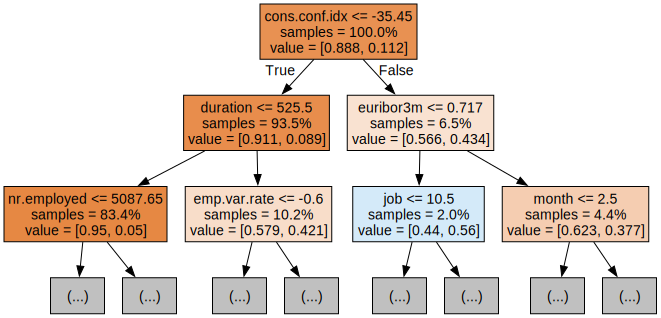

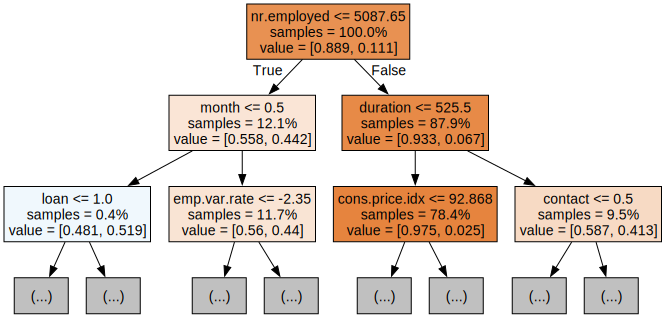

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz

# Train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Export the first three decision trees
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(
        tree,
        feature_names=X_train.columns,
        filled=True,
        max_depth=2,
        impurity=False,
        proportion=True
    )
    graph = graphviz.Source(dot_data)
    display(graph)  # only works in Jupyter Notebook

In [24]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}


rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': <scipy.stats....0024F7FD05810>, 'n_estimators': <scipy.stats....0024F7FD06CE0>}"
,n_iter,5
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [25]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 439}


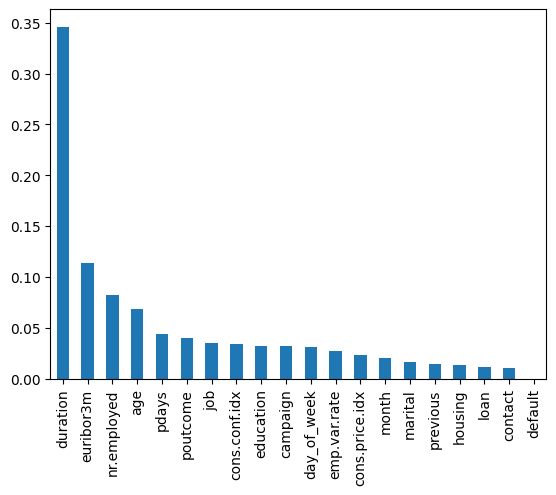

In [26]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar();